## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline
import pickle
from xgboost import XGBClassifier

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#### Import the CSV Data as Pandas DataFrame

In [34]:
df = pd.read_csv('data/data2.csv')

#### Show Top 5 Records

In [35]:
df.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0


#### Preparing X and Y variables

In [36]:
X = df.drop(["churned", 'cust_id'], axis = 1)


In [37]:
X.head()

,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years
0,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258
1,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676
2,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064
3,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058
4,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443


In [38]:
print("Categories in 'churned' variable:     ",end=" " )
print(df['churned'].unique())

print("Categories in 'main_remittance_corridor' variable:  ",end=" ")
print(df['main_remittance_corridor'].unique())

Categories in 'churned' variable:      [0 1]
Categories in 'main_remittance_corridor' variable:   ['AE_IN' 'AE_PK' 'AE_PH']


In [39]:
y = df['churned']

In [40]:
y

0       0
1       0
2       1
3       0
4       0
       ..
6633    1
6634    0
6635    0
6636    0
6637    1
Name: churned, Length: 6638, dtype: int64

In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [42]:
X = preprocessor.fit_transform(X)

In [43]:
X.shape

(6638, 14)

In [44]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5310, 14), (1328, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [46]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [54]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    return accuracy, f1, precision, recall

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_accuracy, train_f1, train_precision, train_recall = evaluate_model(y_train, y_train_pred)
    test_accuracy, test_f1, test_precision, test_recall = evaluate_model(y_test, y_test_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print("- F1 Score: {:.4f}".format(train_f1))
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_accuracy))
    print("- F1 Score: {:.4f}".format(test_f1))
    print("- Precision: {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    accuracy_list.append(test_accuracy)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9861
- F1 Score: 0.9859
- Precision: 0.9858
- Recall: 0.9861
----------------------------------
Model performance for Test set
- Accuracy: 0.9797
- F1 Score: 0.9787
- Precision: 0.9794
- Recall: 0.9797


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9838
- F1 Score: 0.9831
- Precision: 0.9835
- Recall: 0.9838
----------------------------------
Model performance for Test set
- Accuracy: 0.9691
- F1 Score: 0.9676
- Precision: 0.9677
- Recall: 0.9691


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9834
- F1 Score: 0.9831
- Precision: 0.9831
- Recall: 0.9834


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Tes

### Results

In [55]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"], ascending=False)

,Model Name,Accuracy
5,CatBoost Classifier,0.986446
4,XGBClassifier,0.985693
2,Decision Tree,0.983434
6,AdaBoost Classifier,0.980422
0,Logistic Regression,0.979669
3,Random Forest,0.978916
1,K-Neighbors Classifier,0.969127


## Linear Regression

In [56]:
# Initialize the CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=False)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Predict on the test data
y_pred = catboost_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % accuracy)

Accuracy of the model is 98.64


## Plot y_pred and y_test

In [58]:
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
results.head()

,Actual Value,Predicted Value
1652,0,0
5936,0,0
2986,0,0
1545,0,0
6289,0,0


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1220
           1       0.98      0.85      0.91       108

    accuracy                           0.99      1328
   macro avg       0.98      0.93      0.95      1328
weighted avg       0.99      0.99      0.99      1328



#### Difference between Actual and Predicted Values

In [60]:
cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Truth')

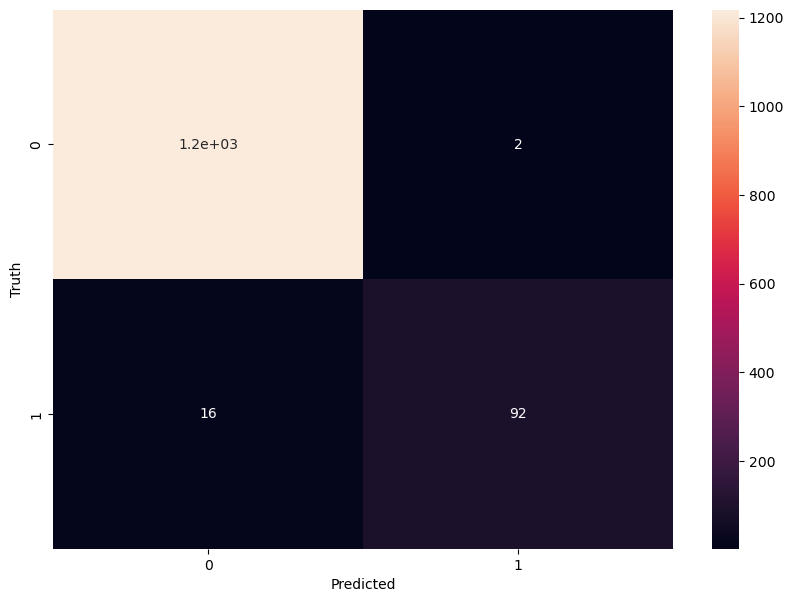

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')